# Gibbs-sampling demo

Here we demonstrate how to use the ``inference.mcmc.GibbsChain`` class to perform Gibbs-sampling.

In [1]:
import matplotlib.pyplot as plt
from numpy import array, exp, linspace
from inference.mcmc import GibbsChain

All MCMC samplers in the ``inference.mcmc`` module take as input a function which maps the model parameters to a log-probability density (typically the posterior log-probability density). Here we use Rosenbrock function to define a log-density function to use as a test-case:

In [2]:
def rosenbrock(t):
    x, y = t
    x2 = x**2
    b = 15.  # correlation strength parameter
    v = 3.   # variance of the gaussian term
    return -x2 - b*(y - x2)**2 - 0.5*(x2 + y**2) / v

Now we can create an instance of `GibbsChain` by passing the posterior distribution and a starting position:

In [3]:
# The maximum of the rosenbrock function is [0,0] - here we intentionally start the chain far from the mode.
start_location = array([2., -4.])

# create the chain object
chain = GibbsChain(posterior=rosenbrock, start=start_location)

MCMC sampler objects can be advanced either for a set amount of time using the ``run_for()`` method, or a fixed number of steps using the ``advance()`` method. Let's advance the chain 150k steps:

In [4]:
chain.advance(150000)

  advancing chain:   [ complete - 150000 steps taken in 0:00:01 ]      


The samples for a particular parameter can be accessed through the ``get_parameter()`` method. We can use this to plot the path of the chain through the 2D parameter space:

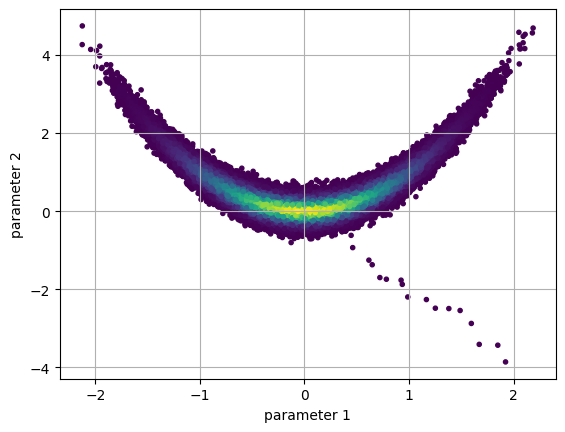

In [5]:
p = chain.get_probabilities() # color the points by their probability value
plt.scatter(
    chain.get_parameter(index=0),
    chain.get_parameter(index=1),
    c=exp(p - p.max()),
    marker = '.'
)
plt.xlabel('parameter 1')
plt.ylabel('parameter 2')
plt.grid()
plt.show()

We can see from this plot that in order to take a representative sample, some early portion of the chain must be removed. This is referred to as the 'burn-in' period. This period allows the chain to both find the high density areas, and adjust the proposal widths to their optimal values.

The ``plot_diagnostics()`` method can help us decide what size of burn-in to use:

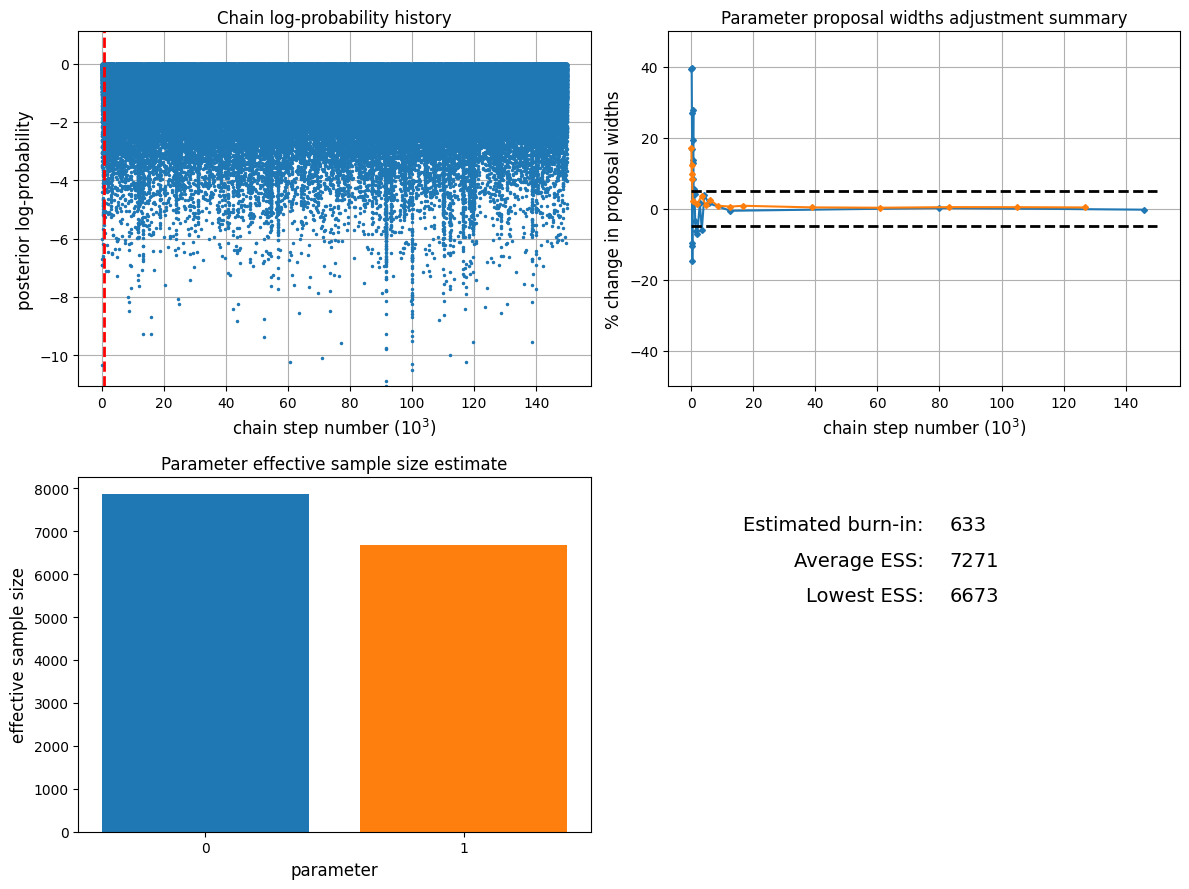

In [6]:
chain.plot_diagnostics()

Occasionally samples are also 'thinned' by a factor of `n` (where only every n'th sample is used) in order to reduce the size of the data-set for storage, or to produce uncorrelated samples.

Based on the diagnostics plot we can choose burn and thin values, which can be passed to methods which access or process sample data, like `get_parameter()`.

In [7]:
burn = 2000
thin = 10

After discarding burn-in, what we have left should be a representative sample drawn from the posterior. Repeating the scatter-plot from earlier we now get:

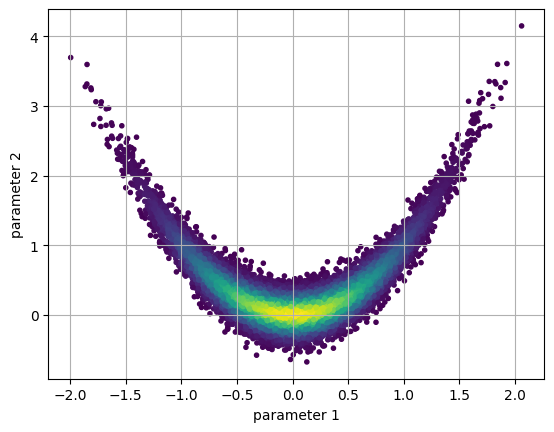

In [8]:
p = chain.get_probabilities(burn=burn, thin=thin)
plt.scatter(
    chain.get_parameter(index=0, burn=burn, thin=thin),
    chain.get_parameter(index=1, burn=burn, thin=thin),
    c=exp(p - p.max()),
    marker = '.'
)
plt.xlabel('parameter 1')
plt.ylabel('parameter 2')
plt.grid()
plt.show()

We can easily estimate 1D marginal distributions for any parameter using the ``get_marginal()`` method:

In [9]:
pdf_1 = chain.get_marginal(0, unimodal=True)
pdf_2 = chain.get_marginal(1, unimodal=True)

``get_marginal()`` returns a 'density estimator' object, which can be called as a function to return the value of the pdf at any point.

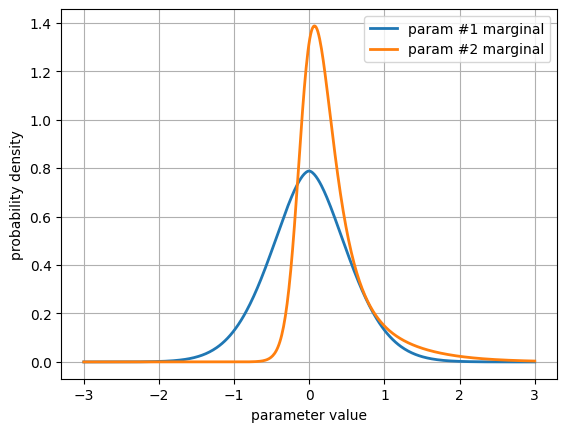

In [12]:
# Make an axis on which to evaluate the PDFs:
axis = linspace(-3, 3, 500)

# plot the results
plt.plot(axis, pdf_1(axis), label='param #1 marginal', lw=2)
plt.plot(axis, pdf_2(axis), label='param #2 marginal', lw=2)
plt.xlabel('parameter value')
plt.ylabel('probability density')
plt.legend()
plt.grid()
plt.show()